## Part 1: Understanding Product Categories

Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("asaniczka/uk-optimal-product-price-prediction")

print("Path to dataset files:", path)




In [ ]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")


In [12]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [13]:
print(
    df.shape,
    df.columns,
    df.info(),
    df.describe(),
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB
(2443651, 9) Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object') None                 uid         stars       reviews         price  \
count  2.443651e+06  2.443651e+06  2.443651e+06  2.443651e+06   
mean   1.370545e+06  2.152836e+00  4.806278e+02  8.924381e+01   
std    8.160562e+05  2.194865e+00  5.944124e+03  3.456089e+02   
min    1.000000e+00  0.000000e+00  0.000000e+0

In [15]:
category_freq = df["category"].value_counts()
category_freq.head(10)


category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Manicure & Pedicure Products               18940
Skin Care                                  18769
Make-up                                    18756
Hair Care                                  18735
Fragrances                                 18564
Name: count, dtype: int64

In [17]:
top5 = category_freq.head(5)
top5


category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

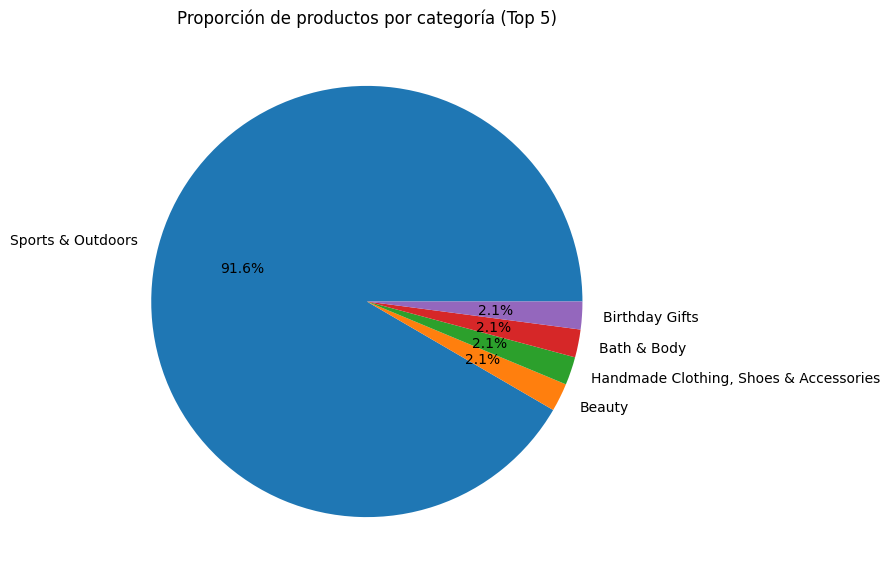

In [18]:
plt.figure(figsize=(7, 7))
top5.plot(kind="pie", autopct="%1.1f%%")
plt.title("Proporción de productos por categoría (Top 5)")
plt.ylabel("")
plt.show()


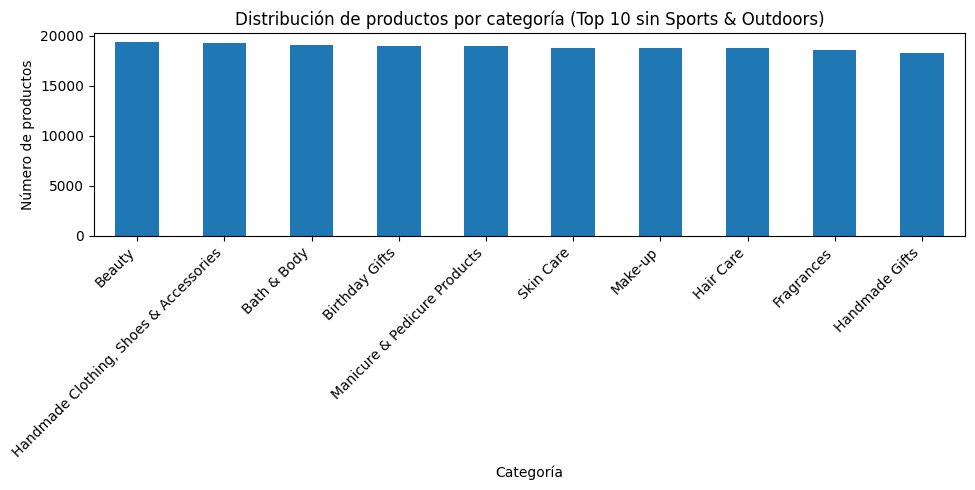

In [20]:
#2. Visualizations

#Debido a que la categoría *Sports & Outdoors* presenta una frecuencia muy superior al resto, la visualización con todas las categorías resulta poco informativa. Por ello, se analizan subconjuntos de categorías más representativas para facilitar la interpretación.


category_freq = df["category"].value_counts()

top_categories_clean = category_freq.drop("Sports & Outdoors").head(10)

plt.figure(figsize=(10, 5))
top_categories_clean.plot(kind="bar")
plt.title("Distribución de productos por categoría (Top 10 sin Sports & Outdoors)")
plt.xlabel("Categoría")
plt.ylabel("Número de productos")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()



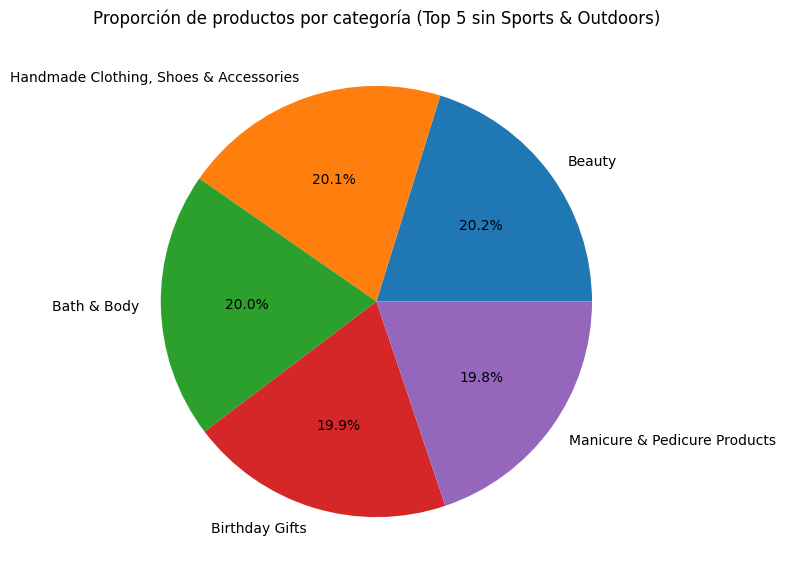

In [21]:
top5 = top_categories_clean.head(5)

plt.figure(figsize=(7, 7))
top5.plot(kind="pie", autopct="%1.1f%%")
plt.title("Proporción de productos por categoría (Top 5 sin Sports & Outdoors)")
plt.ylabel("")
plt.show()


## Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 



=== CENTRALIDAD (PRICE) ===
Media:   89.2438
Mediana: 19.0900
Moda:    9.9900

Interpretación rápida:
- Si la media > mediana, suele haber cola derecha (outliers altos) que empujan la media.
- La moda refleja el punto de precio más repetido (posibles precios 'psicológicos').

=== DISPERSIÓN (PRICE) ===
Varianza:             119445.4853
Desv. estándar:       345.6089
Rango (max-min):      100000.0000
IQR (Q3-Q1):          36.0000

Interpretación rápida:
- Un rango muy alto y/o desviación estándar grande indican precios muy dispersos.
- El IQR describe dónde cae el 50% central (más robusto ante outliers).


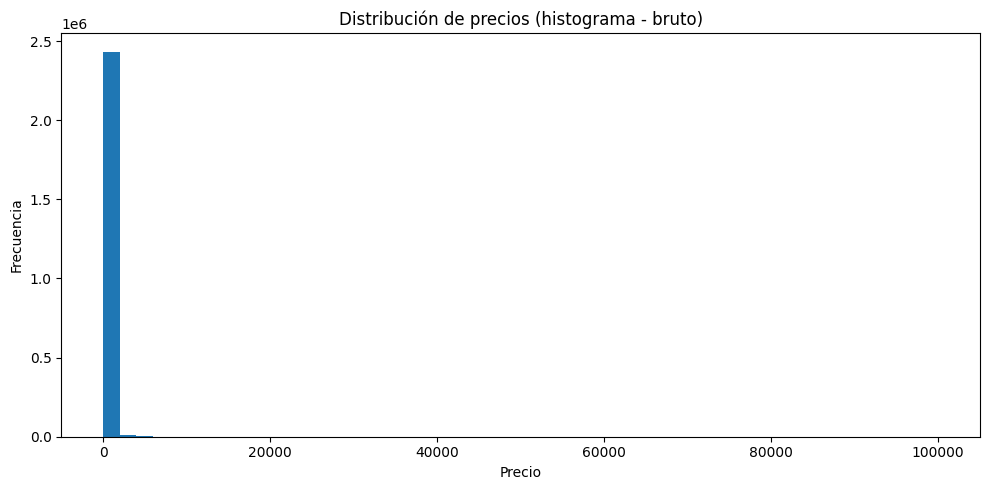


=== HISTOGRAMA: POSIBLE PROBLEMA Y SOLUCIÓN ===
Percentil 99 (p99): 1408.8200
Si el histograma bruto se ve 'aplastado', es por valores extremos. Mostramos histograma hasta p99.


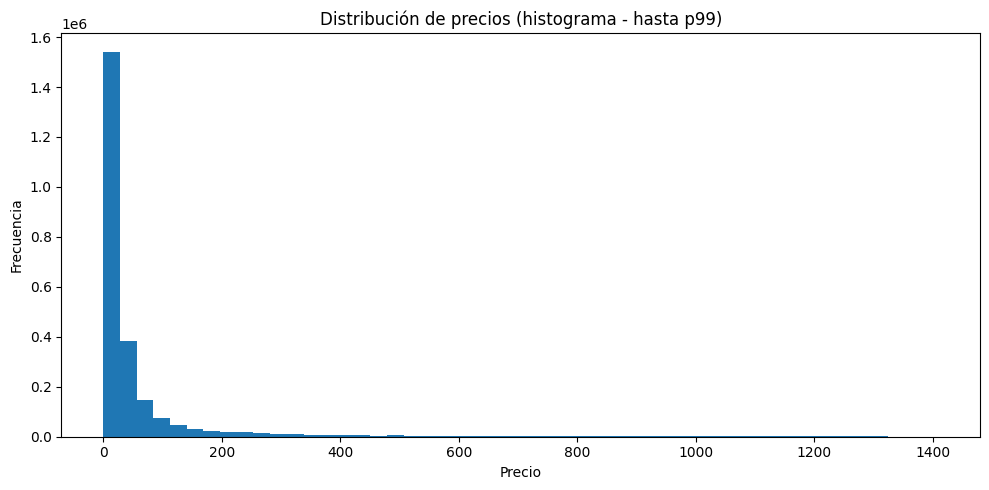

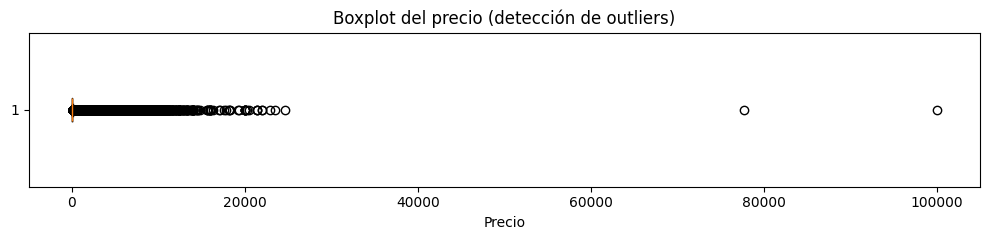


=== OUTLIERS (regla 1.5*IQR) ===
Límite inferior: -44.0100 | Límite superior: 99.9900
Nº outliers aprox: 327688
Ejemplos de outliers altos (top 10):
100000.00
 77752.00
 24674.59
 23482.73
 22933.42
 21999.00
 21999.00
 21464.82
 21464.82
 21464.82


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df["price"] = pd.to_numeric(df["price"], errors="coerce")
price = df["price"].dropna()


# 1) Medidas de centralidad
mean_price = price.mean()
median_price = price.median()

# Mode puede devolver varios valores; cogemos el primero
mode_series = price.mode()
mode_price = mode_series.iloc[0] if len(mode_series) > 0 else np.nan

print("\n=== CENTRALIDAD (PRICE) ===")
print(f"Media:   {mean_price:.4f}")
print(f"Mediana: {median_price:.4f}")
print(f"Moda:    {mode_price:.4f}")
print("\nInterpretación rápida:")
print("- Si la media > mediana, suele haber cola derecha (outliers altos) que empujan la media.")
print("- La moda refleja el punto de precio más repetido (posibles precios 'psicológicos').")

# 2) Medidas de dispersión
var_price = price.var()
std_price = price.std()
range_price = price.max() - price.min()
iqr_price = price.quantile(0.75) - price.quantile(0.25)

print("\n=== DISPERSIÓN (PRICE) ===")
print(f"Varianza:             {var_price:.4f}")
print(f"Desv. estándar:       {std_price:.4f}")
print(f"Rango (max-min):      {range_price:.4f}")
print(f"IQR (Q3-Q1):          {iqr_price:.4f}")

print("\nInterpretación rápida:")
print("- Un rango muy alto y/o desviación estándar grande indican precios muy dispersos.")
print("- El IQR describe dónde cae el 50% central (más robusto ante outliers).")

# 3) Visualizaciones
# 3.1 Histograma "bruto"
plt.figure(figsize=(10, 5))
plt.hist(price, bins=50)
plt.title("Distribución de precios (histograma - bruto)")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

# Si el histograma es difícil de leer:
# normalmente es por outliers altos que estiran el eje X y 'aplastan' el resto.
# Solución 1: recortar a percentiles (p.ej. p99) para ver el grueso
p99 = price.quantile(0.99)
price_p99 = price[price <= p99]

print("\n=== HISTOGRAMA: POSIBLE PROBLEMA Y SOLUCIÓN ===")
print(f"Percentil 99 (p99): {p99:.4f}")
print("Si el histograma bruto se ve 'aplastado', es por valores extremos. Mostramos histograma hasta p99.")

plt.figure(figsize=(10, 5))
plt.hist(price_p99, bins=50)
plt.title("Distribución de precios (histograma - hasta p99)")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

# 3.2 Boxplot para ver outliers
plt.figure(figsize=(10, 2.5))
plt.boxplot(price, vert=False)
plt.title("Boxplot del precio (detección de outliers)")
plt.xlabel("Precio")
plt.tight_layout()
plt.show()

# Extra: conteo aproximado de outliers según regla 1.5*IQR
q1 = price.quantile(0.25)
q3 = price.quantile(0.75)
iqr = q3 - q1
lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr
outliers = price[(price < lower_fence) | (price > upper_fence)]

print("\n=== OUTLIERS (regla 1.5*IQR) ===")
print(f"Límite inferior: {lower_fence:.4f} | Límite superior: {upper_fence:.4f}")
print("Nº outliers aprox:", outliers.shape[0])
print("Ejemplos de outliers altos (top 10):")
print(outliers.sort_values(ascending=False).head(10).to_string(index=False))


### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

---

**Submission**: Submit a Jupyter Notebook which contains code and a business-centric report summarizing your findings. 

=== CHECKS ===
N starss válidos: 2443651
Min: 0.0 | Max: 5.0

=== CENTRALIDAD (stars) ===
Media:   2.1528
Mediana: 0.0000
Moda:    0.0000

Interpretación rápida:
- Media y mediana cercanas indican valoraciones relativamente estables.
- Una moda alta (p. ej. 4 o 5) sugiere un sesgo positivo típico de marketplaces.

=== DISPERSIÓN (stars) ===
Varianza:       4.8174
Desv. estándar: 2.1949
IQR (Q3-Q1):    4.4000

Interpretación rápida:
- Desviación estándar baja → opiniones consistentes.
- Desviación alta → experiencias heterogéneas entre clientes.

=== FORMA DE LA DISTRIBUCIÓN (stars) ===
Skewness:  0.0812
Kurtosis:  -1.9260

Interpretación rápida:
- Skewness negativa → concentración de starss altos.
- Skewness positiva → mayor presencia de starss bajos.
- Kurtosis alta → valores muy concentrados alrededor de uno o varios starss.


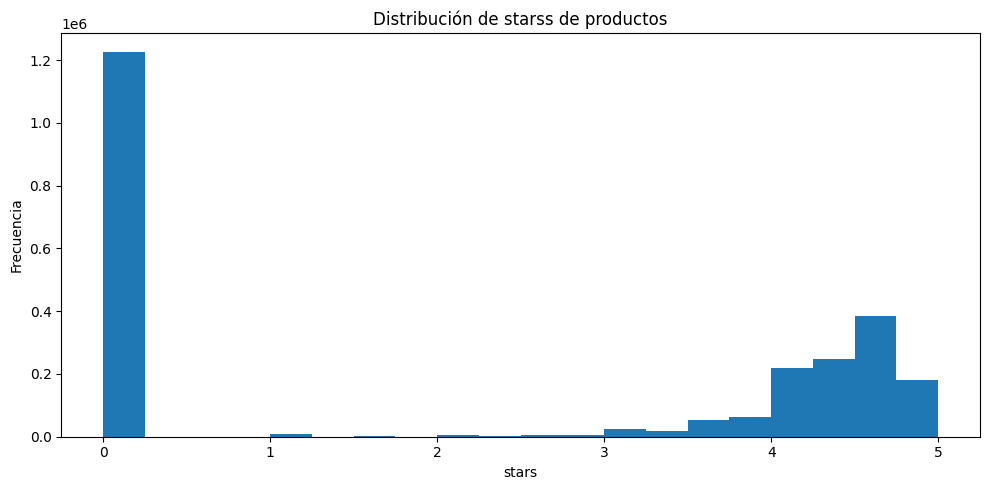


=== CONCLUSIÓN RÁPIDA ===
Si el histograma muestra un pico claro en valores altos (4–5),
indica una percepción generalmente positiva de los productos,
aunque puede existir sesgo de selección en las valoraciones.


In [25]:

# 0) Asegurar que 'stars' es numérico y sin nulos
df["stars"] = pd.to_numeric(df["stars"], errors="coerce")
stars = df["stars"].dropna()

print("=== CHECKS ===")
print("N starss válidos:", stars.shape[0])
print("Min:", stars.min(), "| Max:", stars.max())

# 1) Medidas de centralidad
mean_stars = stars.mean()
median_stars = stars.median()

# Moda puede devolver varios valores; cogemos el primero
mode_series = stars.mode()
mode_stars = mode_series.iloc[0] if len(mode_series) > 0 else np.nan

print("\n=== CENTRALIDAD (stars) ===")
print(f"Media:   {mean_stars:.4f}")
print(f"Mediana: {median_stars:.4f}")
print(f"Moda:    {mode_stars:.4f}")

print("\nInterpretación rápida:")
print("- Media y mediana cercanas indican valoraciones relativamente estables.")
print("- Una moda alta (p. ej. 4 o 5) sugiere un sesgo positivo típico de marketplaces.")

# 2) Medidas de dispersión
var_stars = stars.var()
std_stars = stars.std()
iqr_stars = stars.quantile(0.75) - stars.quantile(0.25)

print("\n=== DISPERSIÓN (stars) ===")
print(f"Varianza:       {var_stars:.4f}")
print(f"Desv. estándar: {std_stars:.4f}")
print(f"IQR (Q3-Q1):    {iqr_stars:.4f}")

print("\nInterpretación rápida:")
print("- Desviación estándar baja → opiniones consistentes.")
print("- Desviación alta → experiencias heterogéneas entre clientes.")

# 3) Forma de la distribución
skew_stars = stars.skew()
kurt_stars = stars.kurt()

print("\n=== FORMA DE LA DISTRIBUCIÓN (stars) ===")
print(f"Skewness:  {skew_stars:.4f}")
print(f"Kurtosis:  {kurt_stars:.4f}")

print("\nInterpretación rápida:")
print("- Skewness negativa → concentración de starss altos.")
print("- Skewness positiva → mayor presencia de starss bajos.")
print("- Kurtosis alta → valores muy concentrados alrededor de uno o varios starss.")

# 4) Visualización: histograma
plt.figure(figsize=(10, 5))
plt.hist(stars, bins=20)
plt.title("Distribución de starss de productos")
plt.xlabel("stars")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

print("\n=== CONCLUSIÓN RÁPIDA ===")
print("Si el histograma muestra un pico claro en valores altos (4–5),")
print("indica una percepción generalmente positiva de los productos,")
print("aunque puede existir sesgo de selección en las valoraciones.")


# Business-centric report summarizing your findings

Este análisis explora los listados de productos en Amazon UK con el objetivo de identificar
patrones relevantes en la distribución de categorías, precios y valoraciones de los
productos. El estudio permite comprender mejor la estructura del catálogo y extraer
implicaciones útiles para la toma de decisiones de negocio.

El análisis por categorías muestra una fuerte concentración en *Sports & Outdoors*, una
categoría claramente sobrerrepresentada en el dataset. Al excluirla para facilitar la
interpretación, se observa que categorías como *Beauty*, *Bath & Body* o *Handmade Clothing*
presentan una distribución más equilibrada, reflejando mercados competitivos pero menos
saturados.

En cuanto a los precios, la diferencia entre media y mediana, junto con un rango y una
desviación estándar elevados, evidencia una alta dispersión. Esto indica la coexistencia
de productos de bajo precio con productos premium, y sugiere la necesidad de segmentar el
mercado por rangos de precio para definir estrategias de pricing más precisas.

El análisis de los ratings revela que una gran parte de los productos no cuenta con
valoraciones, lo que se refleja en una mediana y moda iguales a cero. Entre los productos
valorados, las opiniones muestran una elevada variabilidad, sin un sesgo claro hacia
ratings altos o bajos.

En conjunto, los resultados ponen de manifiesto un marketplace heterogéneo y altamente
competitivo, donde la diferenciación por categoría, una estrategia de precios bien definida
y la gestión activa de las valoraciones de los clientes son factores clave para mejorar el
posicionamiento y el rendimiento comercial.
